<a href="https://colab.research.google.com/github/abhiwalia33/Laptop-Price-Prediction-ML-Project/blob/main/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION

This project shows a Laptop price prediction system by using the supervised machine learning technique. The research uses random decision forest as the machine learning prediction method which offered 88.7% prediction precision.

Using random decision forest, there are multiple independent variables but one and only one dependent variable whose actual and predicted values are compared to find precision of results.

This project proposes a system where price is dependent variable which is predicted, and this price is derived from factors like Laptop’s model, RAM, ROM (HDD/SSD), GPU, CPU, IPS Display, and Touch Screen.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
df = pd.read_csv("/content/laptop.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
dfc = df.copy()

In [ ]:
dfc.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
dfc.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
# using drop function
dfc = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)
dfc.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# checking if our dataset contain null values or not
dfc.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
null_raws = dfc[dfc.isnull().all(axis=1)]
print(null_raws)

     Company TypeName Inches ScreenResolution  Cpu  Ram Memory  Gpu OpSys  \
20       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
46       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
50       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
115      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
125      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
148      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
190      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
209      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
267      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
336      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
350      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
478      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   

In [ ]:
# now that we know the number of raws which are null i have decided to drop them as it does not contain any information which will be useful for later
dfc.dropna(axis=0,how='all',inplace = True)

In [ ]:
# checking again for missing values
dfc.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
#checking statistical data
dfc.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [ ]:
dfc.head() #removing 'GB'  from RAM and 'kg' from weight


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
dfc['Ram'] = dfc['Ram'].str.replace('GB','')
dfc['Weight'] = dfc['Weight'].str.replace('kg','')

In [ ]:
dfc.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
dfc['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', nan, '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23', '?',
       '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3', '1.68',
       '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14', '1.36',
       '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28', '2.33',
       '1.45', '2.79', '8.23', '1.26', '1.84', '0.0002', '2.6', '2.26',
       '3.25', '1.59', '1.13', '1.42', '1.78', '1.10', '1.15', '1.

In [ ]:
import numpy as np

# Replace '?' with NaN
dfc['Weight'] = dfc['Weight'].replace('?', np.nan)


In [ ]:
dfc['Ram'] = dfc['Ram'].astype('int32') #now datatypes are getting converted
dfc['Weight'] = dfc['Weight'].astype('float32')
dfc.info()

ValueError: cannot convert float NaN to integer

In [ ]:
#seperating categorical & numerical values

categorical_columns = dfc.select_dtypes(include=["object"]).columns
numerical_columns = dfc.select_dtypes(exclude=["object"]).columns

categorical_columns


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [ ]:
numerical_columns

Index(['Price'], dtype='object')

while observing the dataset i noticed we can remove 'GB' from RAM column and 'kg' from weight therefore we will have numerical columns which will be useful for further analysis

Exploratry Data Analysis

Price distribution Plot

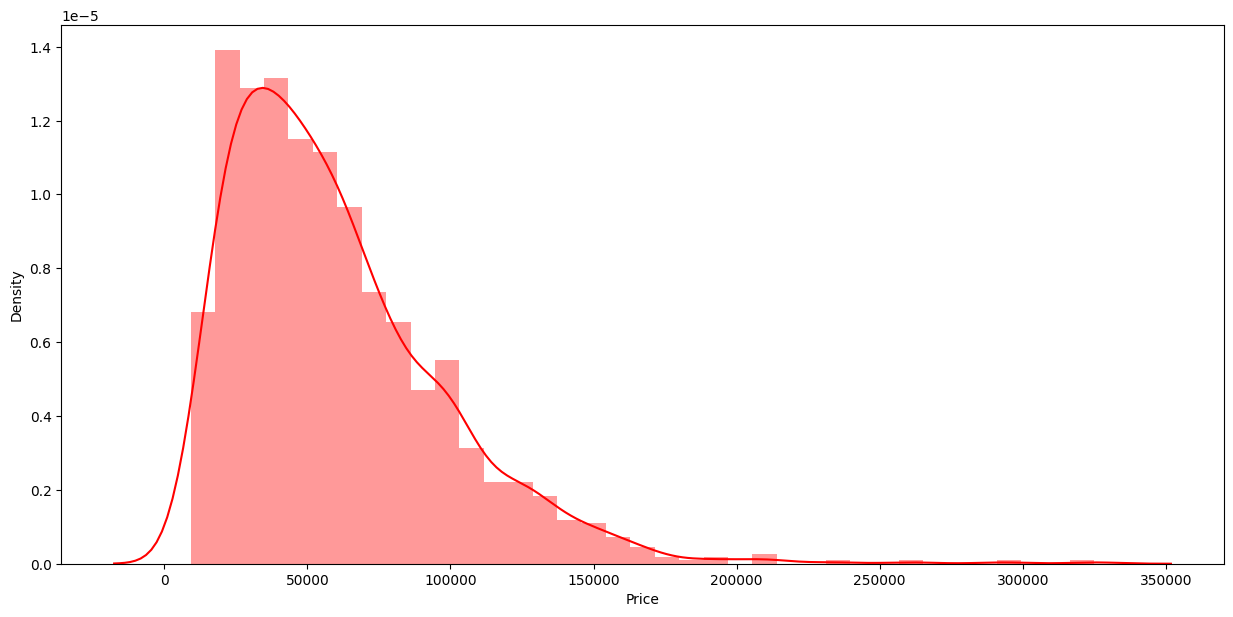

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(dfc['Price'],color = 'red')
plt.show()

Countplot for Categorical columns

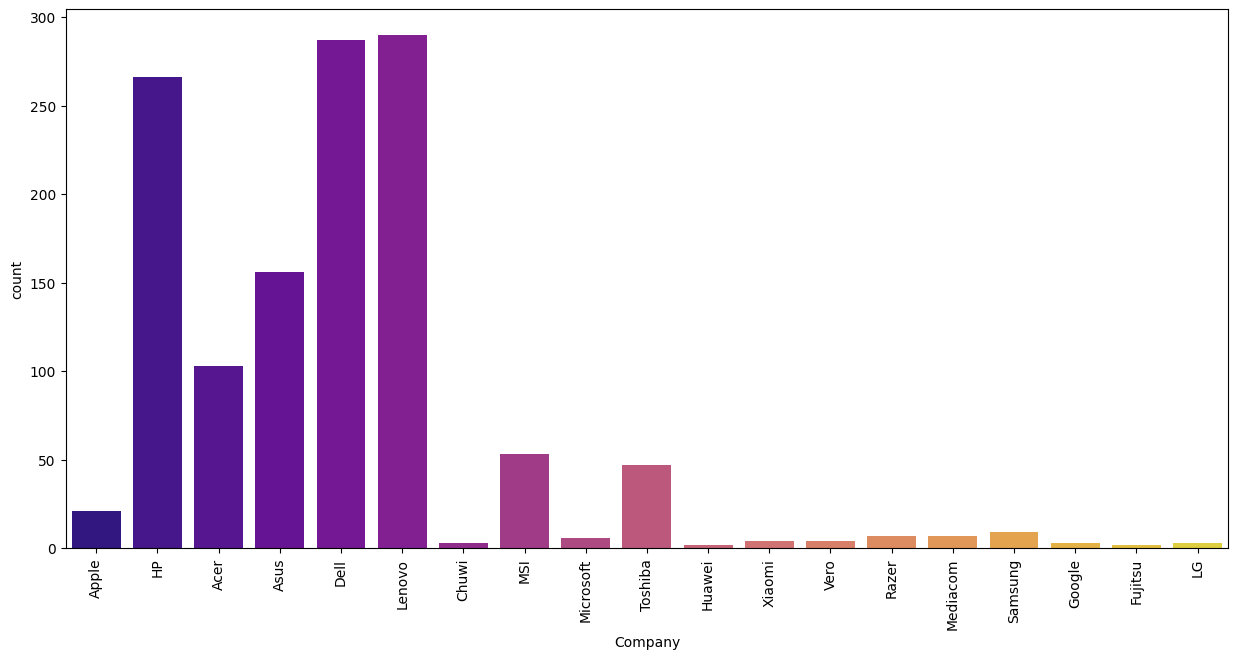

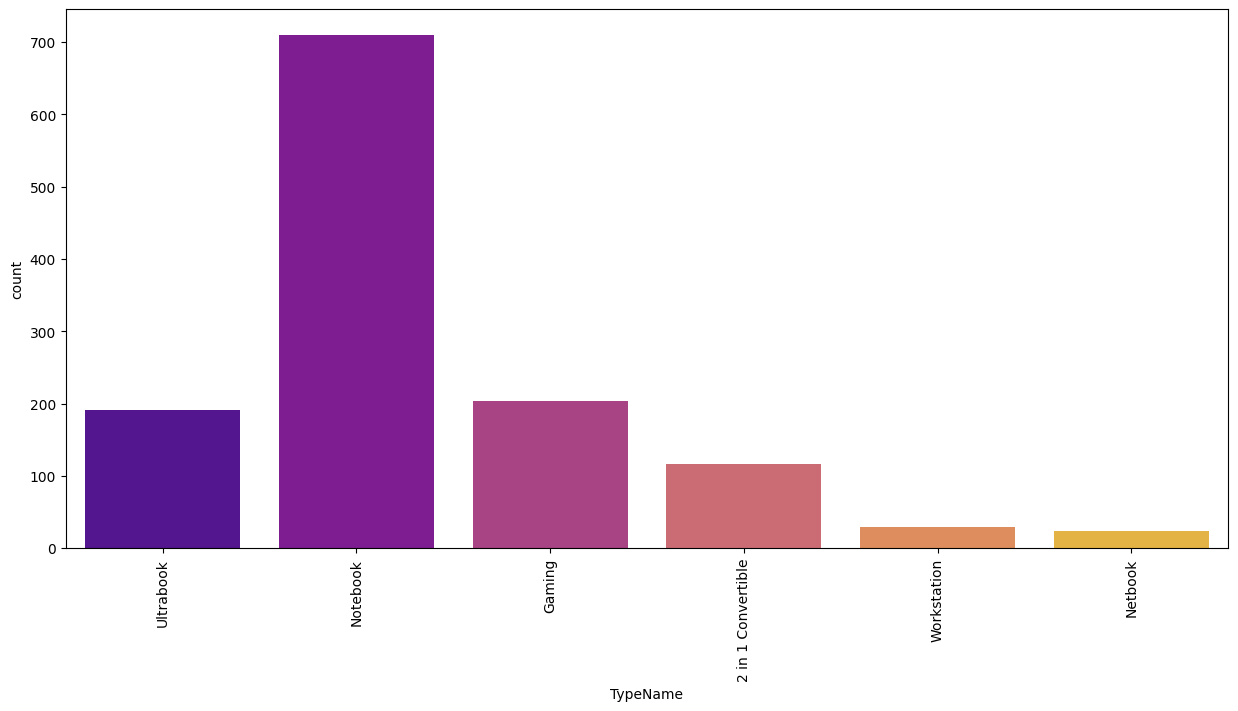

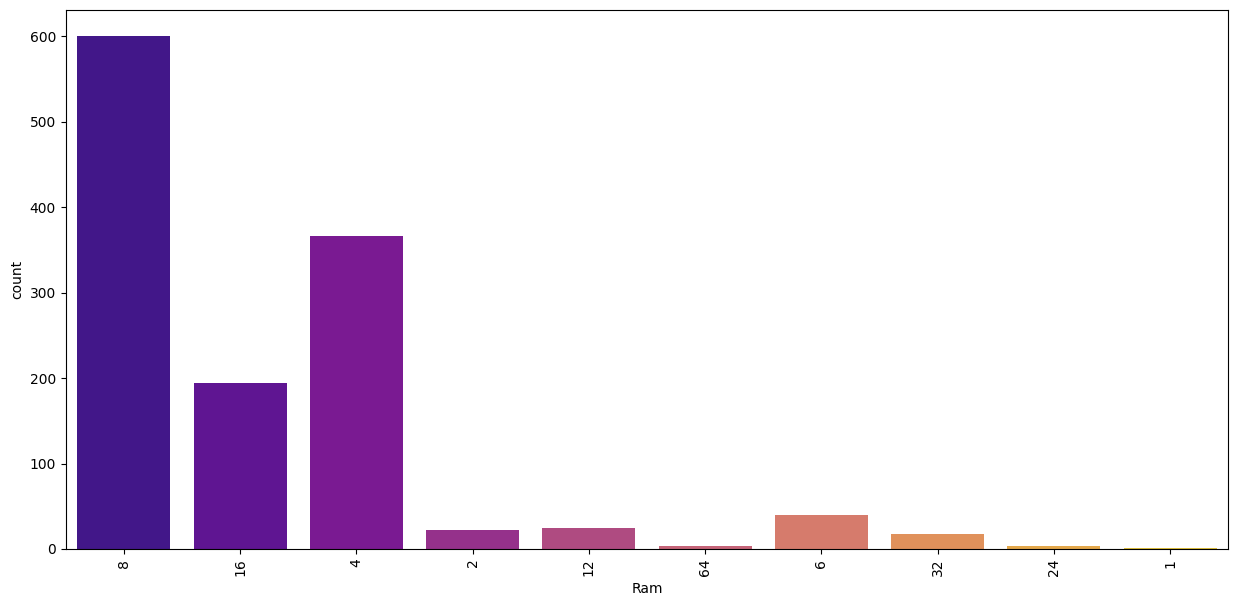

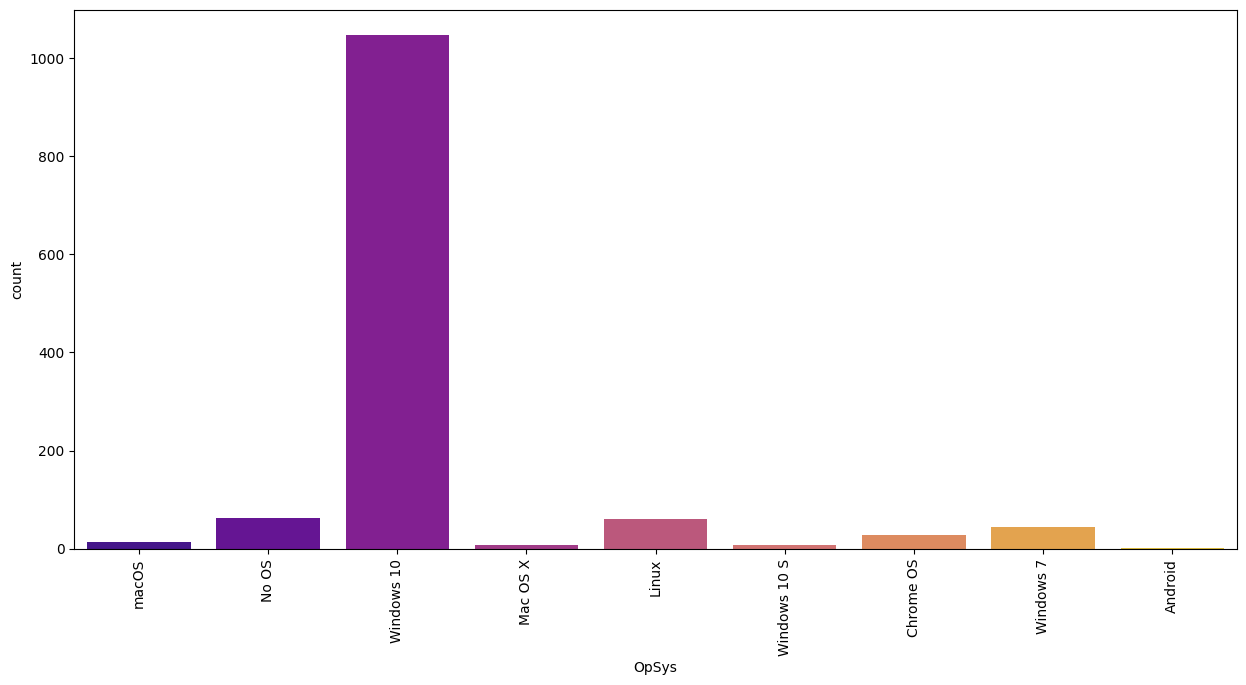

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawplot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(x=dfc[col], palette='plasma')  # Specify x=df[col]
    plt.xticks(rotation='vertical')
    plt.xlabel(col)  # Add x-axis label

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

In [ ]:
# highest market share is of dell,Lenovo,HP
# for the type category notebooks are most sold category
# 8 gb ram is mostly picked by the user
# windows OS is mostly used OS system

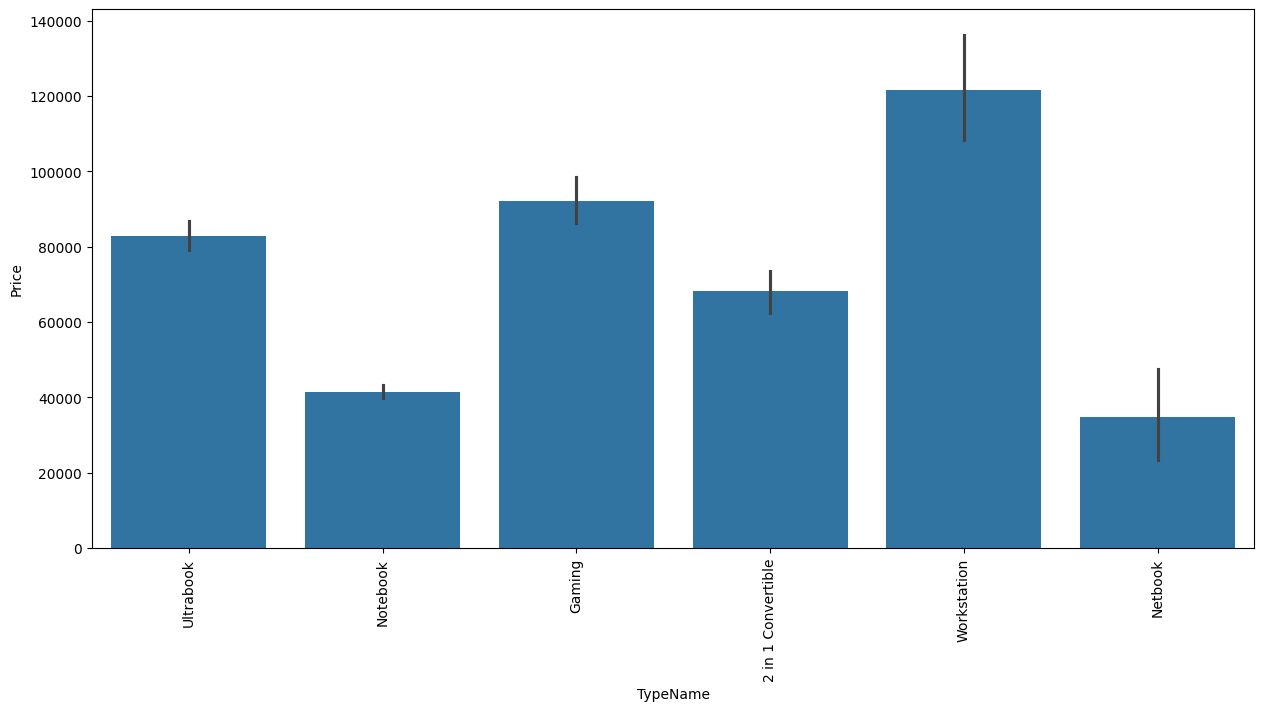

In [ ]:
#bar-plot for typename & price
plt.figure(figsize=(15,7))
sns.barplot(x=dfc['TypeName'],y=dfc['Price'])
plt.xticks(rotation ='vertical')
plt.show()

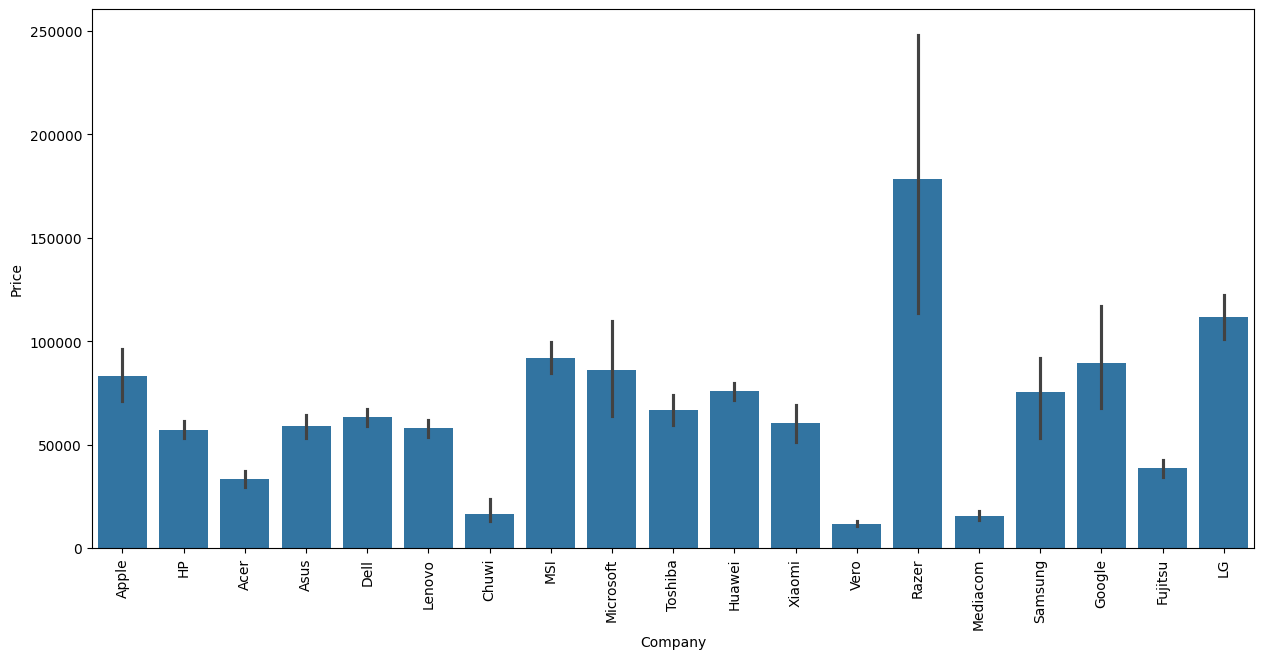

In [ ]:
# Barplot for - "Average price of each laptop brand"
plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'],y=dfc['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
dfc['ScreenResolution'].value_counts()

Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
# creating new column - Touchscreen
dfc['TouchScreen'] = dfc['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
dfc.sample(5)

TypeError: argument of type 'float' is not iterable

In [ ]:
# creating new column IPS
dfc['IPS'] = dfc['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
dfc.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1085,HP,Notebook,14,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.54,54931.1472,0,0
335,HP,Notebook,14,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,67559.0400,0,0
233,Dell,Notebook,14,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,45767.5200,0,0
1244,HP,Notebook,14,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,58607.4672,0,0
195,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.9200,0,1


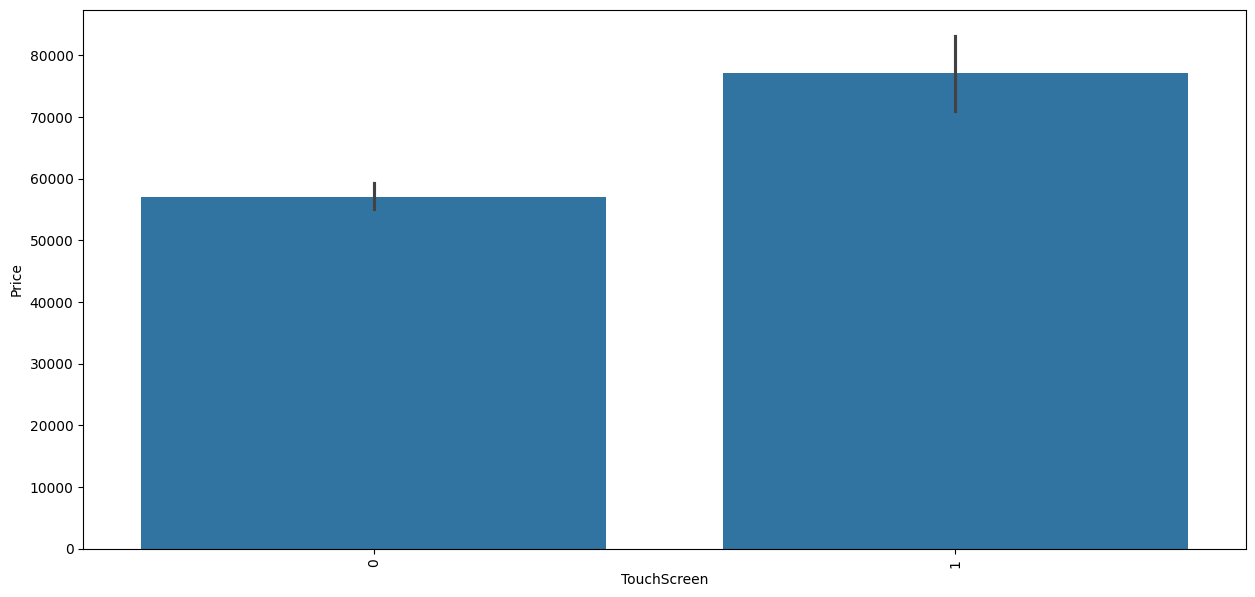

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = dfc['TouchScreen'],y = dfc['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float32
 10  Price             1273 non-null   float64
 11  TouchScreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(2), object(8)
memory usage: 161.6+ KB


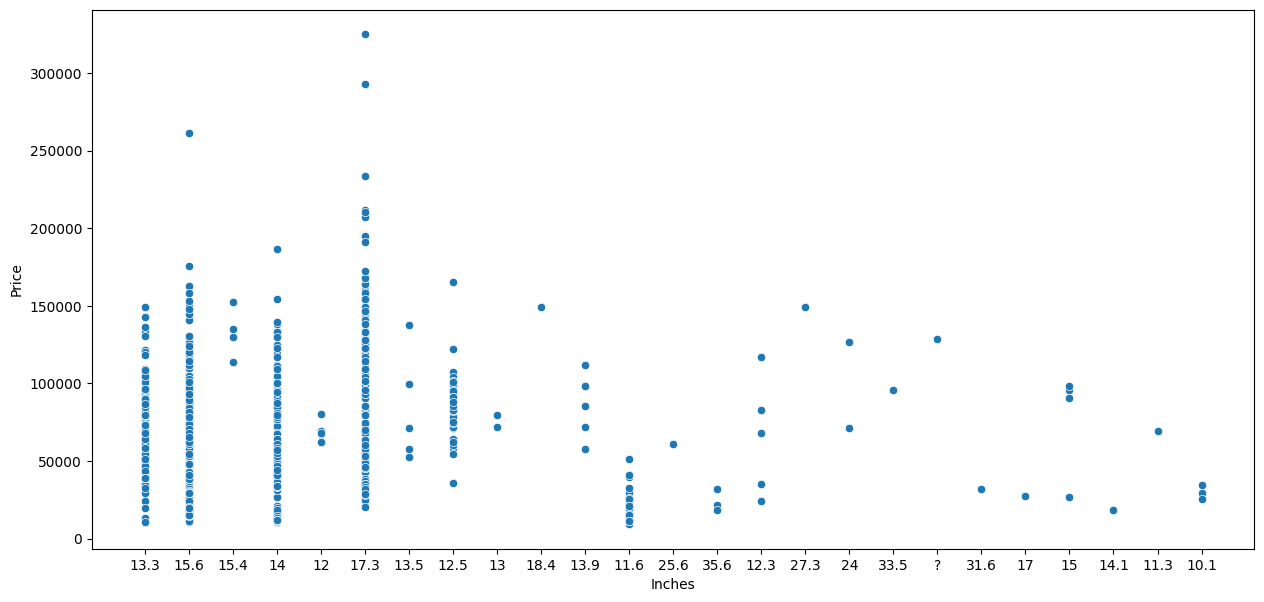

In [ ]:
# relationship b/w size of laptops & price
plt.figure(figsize=(15,7))
sns.scatterplot(x=dfc['Inches'],y=dfc['Price'])
plt.show()

In [ ]:
# splitting screen -resoultion into two columns seperately
new = dfc['ScreenResolution'].str.split('x',n=1,expand=True)
dfc['X_res'] = new[0]
dfc['Y_res'] = new[1]
dfc.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
993,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,71874.720,0,0,Full HD 1920,1080
360,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389.920,0,0,1366,768
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,51148.800,0,0,Full HD 1920,1080
269,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05,46886.400,0,0,Full HD 1920,1080
721,HP,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,44574.048,1,1,IPS Panel Touchscreen 1366,768


In [ ]:
dfc['X_res'] = dfc['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
dfc.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
dfc['X_res'] = dfc['X_res'].astype('int')
dfc['Y_res'] = dfc['Y_res'].astype('int')

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float32
 10  Price             1273 non-null   float64
 11  TouchScreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(4), object(8)
memory usage: 181.5+ KB


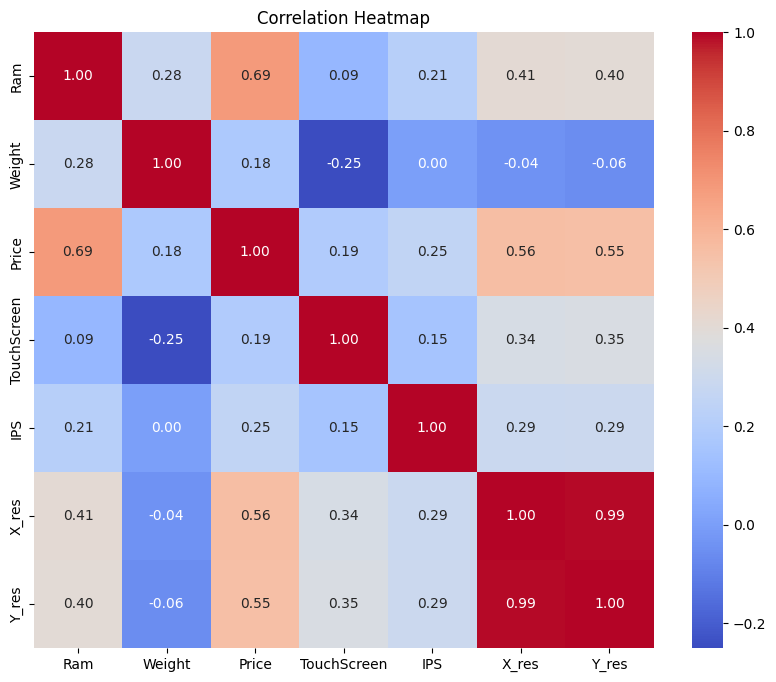

In [ ]:
correlation_matrix = dfc.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dfc['Inches'] = pd.to_numeric(dfc['Inches'], errors='coerce')

# Calculate PPI
dfc['ppi'] = (((dfc['X_res']**2) + (dfc['Y_res']**2))**0.5 / dfc['Inches']).astype('float')

In [ ]:
# inches was showing object datatype and throwing changed its datatype and created new column PPI
dfc.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


PPI(pixel per inch) is a useful feature which indicates higher resolutions which is often liked by the user and linked with higher prices

In [ ]:
dfc.isnull().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              1
Price               0
TouchScreen         0
IPS                 0
X_res               0
Y_res               0
ppi                 1
dtype: int64

In [ ]:
# imputing missing values due to which ppi column was not showing

nan_rows = dfc[dfc['ppi'].isnull()]
nan_rows_inch = dfc[dfc['Inches'].isnull()]
nan_rows_weight = dfc[dfc['Weight'].isnull()]

In [ ]:
mean_inch = dfc['Inches'].mean()
mean_weight = dfc['Weight'].mean()

# Replace null values with the mean
dfc['Inches'].fillna(mean_inch, inplace=True)
dfc['Weight'].fillna(mean_weight, inplace=True)

In [ ]:
# inspecting missing value due to which ppi is not showing in correlation
print(nan_rows[['X_res', 'Y_res', 'Inches']])

     X_res  Y_res  Inches
476   1920   1080     NaN


In [ ]:
mean_ppi = dfc['ppi'].mean()
dfc['ppi'].fillna(mean_ppi,inplace=True)

In [ ]:
dfc.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
TouchScreen         0
IPS                 0
X_res               0
Y_res               0
ppi                 0
dtype: int64

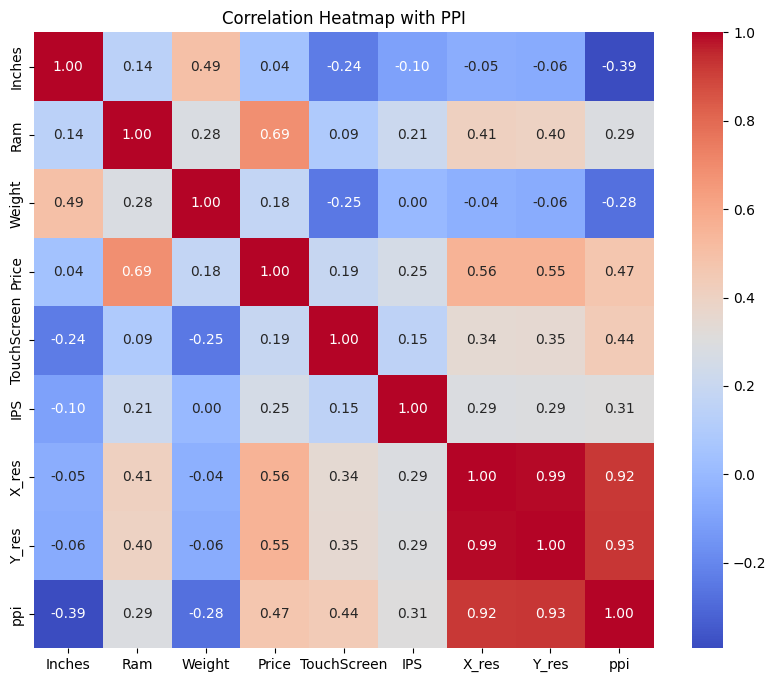

In [ ]:
# Recalculate correlation matrix
correlation_matrix = dfc.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with PPI')
plt.show()

In [ ]:
# since PPI is the combination of inches ,X_res,Y_res we can drop these column
#feature selection

dfc.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
dfc.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
#CPU analysis
dfc['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: Cpu, Length: 118, dtype: int64

mainly we have intel processors only so we can combine them to single category and then rest into not intel and AMD processors

In [ ]:
dfc['Cpu name'] = dfc['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
dfc.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
dfc['Cpu brand'] = dfc['Cpu name'].apply(fetch_processor)
dfc.head(20)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD A9-Series 9420,AMD Processor
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,Intel Core i7
7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,Intel Core i5
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,Intel Core i7
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,Intel Core i5


<Axes: >

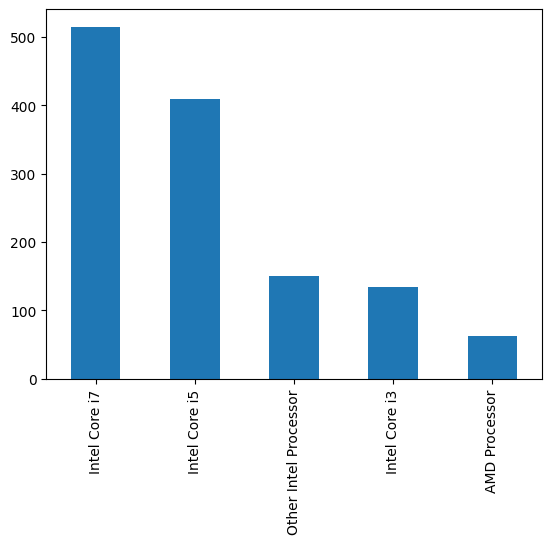

In [ ]:
dfc['Cpu brand'].value_counts().plot(kind='bar')

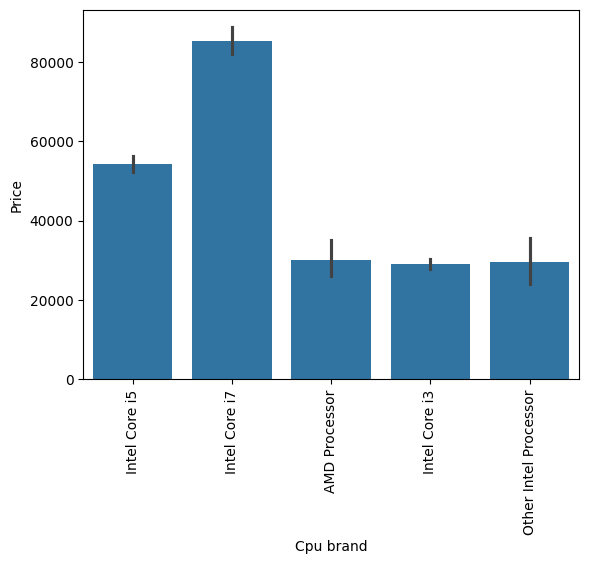

In [ ]:
sns.barplot(x=dfc['Cpu brand'],y=dfc['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
dfc.drop(columns=['Cpu','Cpu name'],inplace=True)
dfc.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


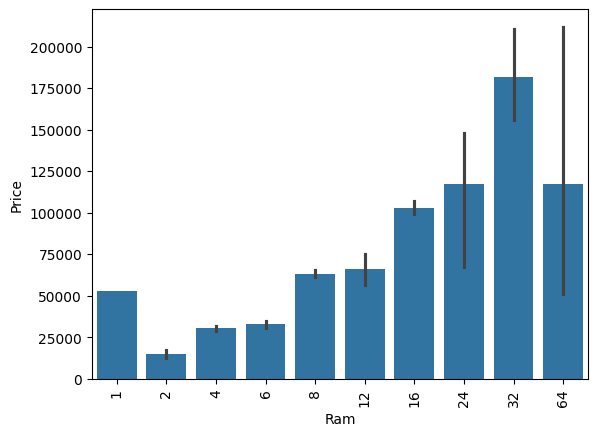

In [ ]:
sns.barplot(x=dfc['Ram'],y=dfc['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
dfc.replace('?', pd.NA, inplace=True)

# Drop rows with NaN values
dfc.dropna(subset=['Memory'], inplace=True)

In [ ]:
dfc['Memory'].value_counts()

256 SSD                         401
1000 HDD                        218
500 HDD                         130
512 SSD                         116
128 SSD +  1000 HDD              92
128 SSD                          74
256 SSD +  1000 HDD              71
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 14
512 SSD +  1000 HDD              14
1000 SSD                         13
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
128 Flash Storage                 4
180 SSD                           4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [ ]:
# Convert Memory column to string and perform replacements
dfc['Memory'] = dfc['Memory'].astype(str).replace('\.0', '', regex=True)
dfc["Memory"] = dfc["Memory"].str.replace('GB', '')
dfc["Memory"] = dfc["Memory"].str.replace('TB', '000')

# Split Memory column into primary and secondary memory parts
new = dfc["Memory"].str.split("+", n=1, expand=True)

# Process primary memory
dfc["first"] = new[0].str.strip()
dfc["Layer1HDD"] = dfc["first"].apply(lambda x: 1 if "HDD" in x else 0)
dfc["Layer1SSD"] = dfc["first"].apply(lambda x: 1 if "SSD" in x else 0)
dfc["Layer1Hybrid"] = dfc["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dfc["Layer1Flash_Storage"] = dfc["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
dfc['first'] = dfc['first'].str.replace(r'\D', '')

# Process secondary memory
dfc["second"] = new[1].fillna("0")
dfc["Layer2HDD"] = dfc["second"].apply(lambda x: 1 if "HDD" in x else 0)
dfc["Layer2SSD"] = dfc["second"].apply(lambda x: 1 if "SSD" in x else 0)
dfc["Layer2Hybrid"] = dfc["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dfc["Layer2Flash_Storage"] = dfc["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
dfc['second'] = dfc['second'].str.replace(r'\D', '')

# Convert columns to integer after replacing empty strings with 0
dfc["first"] = dfc["first"].replace('', '0').astype(int)
dfc["second"] = dfc["second"].replace('', '0').astype(int)

# Calculate total memory for different types
dfc["HDD"] = (dfc["first"] * dfc["Layer1HDD"] + dfc["second"] * dfc["Layer2HDD"])
dfc["SSD"] = (dfc["first"] * dfc["Layer1SSD"] + dfc["second"] * dfc["Layer2SSD"])
dfc["Hybrid"] = (dfc["first"] * dfc["Layer1Hybrid"] + dfc["second"] * dfc["Layer2Hybrid"])
dfc["Flash_Storage"] = (dfc["first"] * dfc["Layer1Flash_Storage"] + dfc["second"] * dfc["Layer2Flash_Storage"])

# Drop intermediate columns
dfc.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                  'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                  'Layer2Flash_Storage'], inplace=True)


In [ ]:
dfc.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1250,Dell,Notebook,4,500 HDD,Intel HD Graphics,Linux,2.200,17262.720,0,0,100.454670,Other Intel Processor,500,0,0,0
1059,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.940,96916.320,0,0,141.211998,Intel Core i7,1000,256,0,0
1100,Dell,Ultrabook,4,500 HDD,Intel HD Graphics 520,Windows 7,1.500,60480.792,0,0,125.367428,Intel Core i3,500,0,0,0
679,Acer,Gaming,16,256 SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.500,69210.720,0,0,141.211998,Intel Core i5,0,256,0,0
1213,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,2.191,53226.720,1,1,141.211998,Intel Core i5,0,256,0,0


In [ ]:
dfc.drop(columns=['Memory'],inplace=True)
dfc.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
dfc.corr()['Price']

Ram              0.686060
Weight           0.175901
Price            1.000000
TouchScreen      0.189033
IPS              0.254930
ppi              0.468808
HDD             -0.095367
SSD              0.668733
Hybrid           0.007849
Flash_Storage   -0.038323
Name: Price, dtype: float64

In [ ]:
#Based on the correlation we observe that Hybrid and Flash Storage are almost negligible

In [ ]:
dfc.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [ ]:
dfc['Gpu'].value_counts()

Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
dfc['Gpu brand'] = dfc['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
dfc.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
dfc['Gpu brand'].value_counts()

Intel     703
Nvidia    393
AMD       175
ARM         1
Name: Gpu brand, dtype: int64

In [ ]:
dfc = dfc[dfc['Gpu brand'] != 'ARM']

In [ ]:
dfc['Gpu brand'].value_counts()

Intel     703
Nvidia    393
AMD       175
Name: Gpu brand, dtype: int64

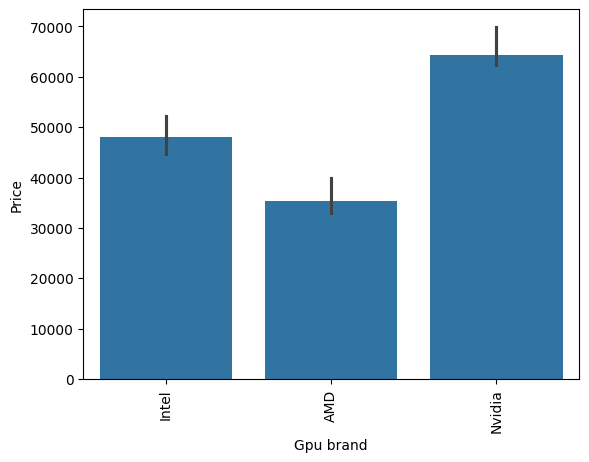

In [ ]:
sns.barplot(x=dfc['Gpu brand'],y=dfc['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
dfc.drop(columns=['Gpu'],inplace=True)

In [ ]:
dfc.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
dfc['OpSys'].value_counts()

Windows 10      1046
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

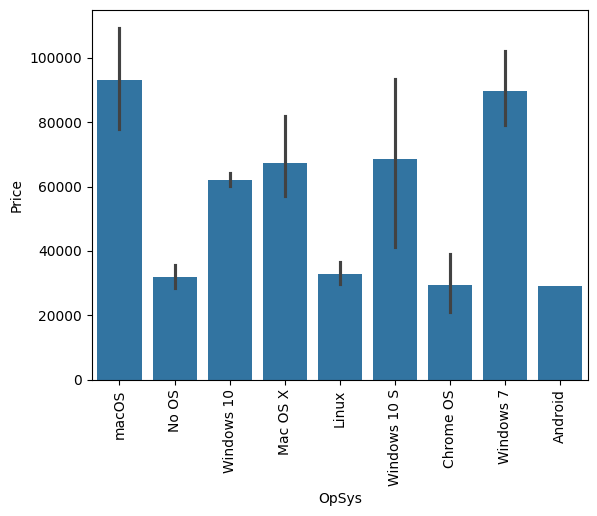

In [ ]:
sns.barplot(x=dfc['OpSys'],y=dfc['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
dfc['os'] = dfc['OpSys'].apply(cat_os)

In [ ]:
dfc.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
dfc.drop(columns=['OpSys'],inplace=True)

In [ ]:
dfc.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


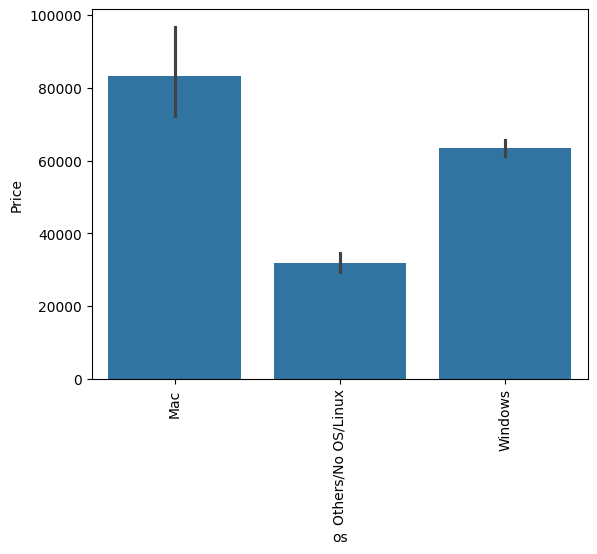

In [ ]:
sns.barplot(x=dfc['os'],y=dfc['Price'])
plt.xticks(rotation='vertical')
plt.show()

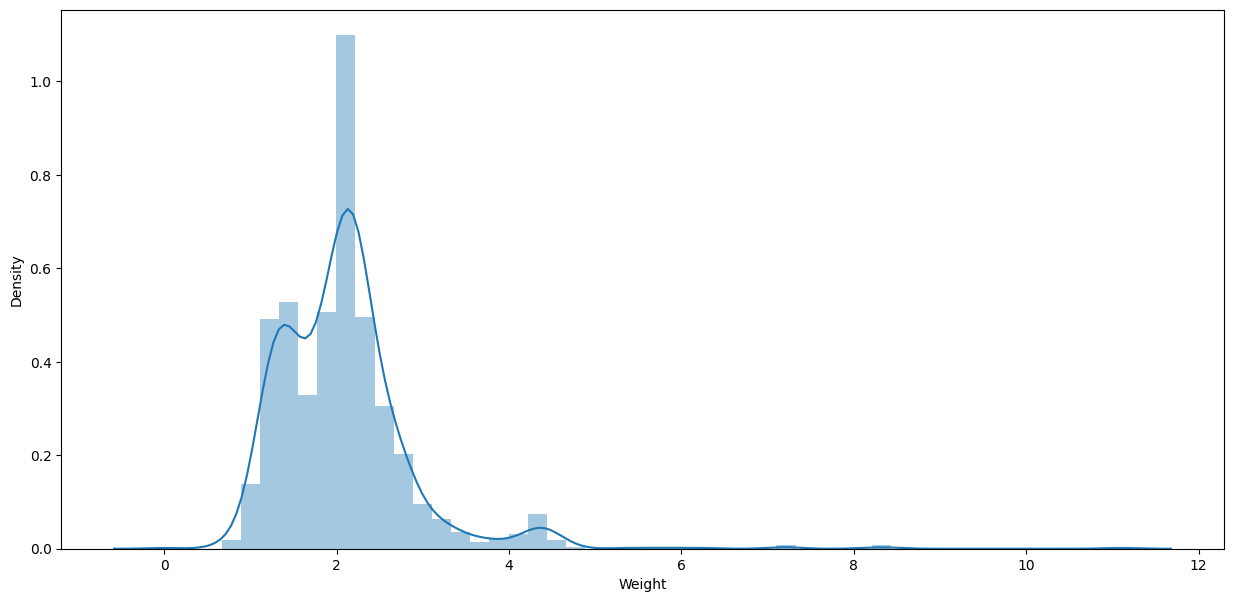

In [ ]:
#Distribution plot on weight column
plt.figure(figsize=(15,7))
sns.distplot(dfc['Weight'])
plt.show()

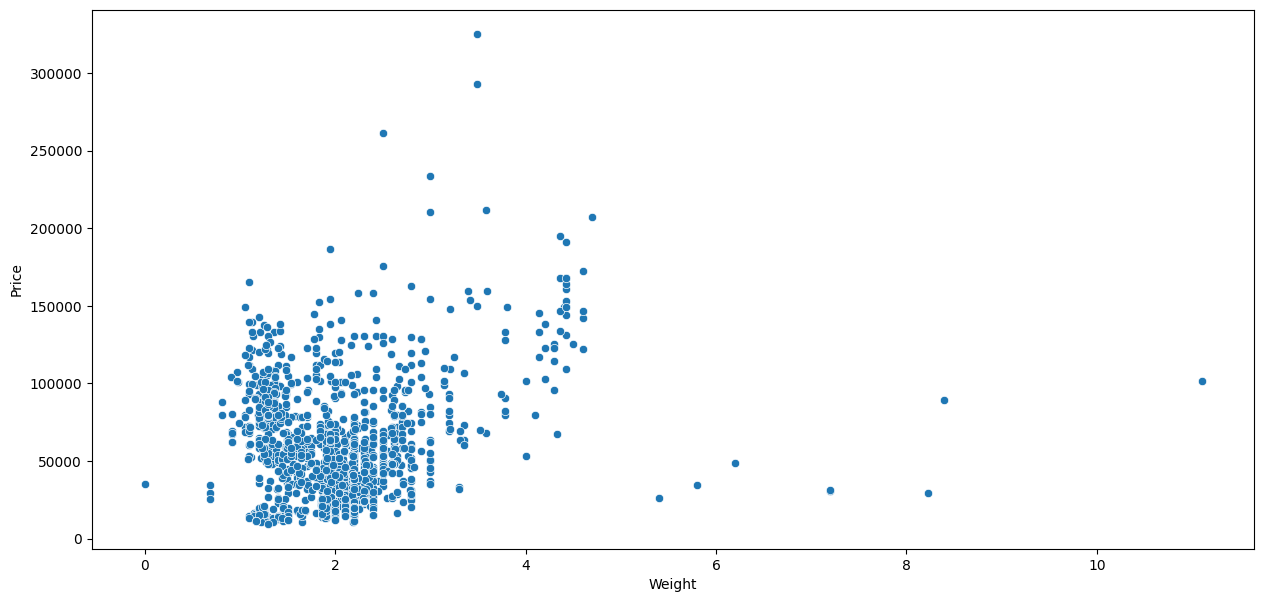

In [ ]:
#Scatterplot - Price variation on weight

plt.figure(figsize=(15,7))
sns.scatterplot(x=dfc['Weight'],y=dfc['Price'])
plt.show()

<Axes: >

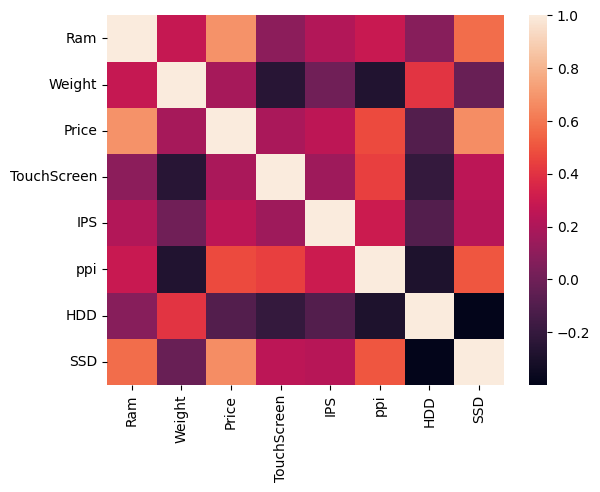

In [ ]:
sns.heatmap(df.corr())

Model training

In [ ]:
dfc.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
# we have 5 categorical columns in our dataset company,typename,cpu brand,gpu brand,os

categorical_cols = ['Company', 'TypeName', 'os', 'Cpu brand', 'Gpu brand']

#applying one-hot encoding
dfc_encod = pd.get_dummies(dfc,columns=categorical_cols)
dfc_encod.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,...,os_Others/No OS/Linux,os_Windows,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,...,1,0,0,0,1,0,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X = dfc_encod.drop(columns=['Price'])
y = np.log(dfc_encod['Price'])
dfc_encod.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,...,os_Others/No OS/Linux,os_Windows,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,...,1,0,0,0,1,0,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X

,Ram,Weight,TouchScreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,os_Others/No OS/Linux,os_Windows,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,0,1,226.983005,0,256,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1271, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train

,Ram,Weight,TouchScreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,os_Others/No OS/Linux,os_Windows,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia
162,8,2.13,0,0,141.211998,0,256,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1188,8,1.23,1,0,276.053530,0,256,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1180,8,1.36,1,1,209.800683,0,256,0,0,0,...,0,1,0,0,1,0,0,0,1,0
286,8,1.95,0,1,141.211998,0,256,0,0,0,...,0,1,0,0,0,1,0,0,1,0
790,8,2.24,0,0,141.211998,1000,128,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,8,1.49,0,0,165.632118,0,256,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1124,4,2.00,0,0,100.454670,1000,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1159,8,1.48,1,0,220.842824,0,512,0,0,0,...,0,1,0,0,0,1,0,0,1,0
883,8,2.20,0,1,141.211998,1000,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([11.64312157, 11.15782785, 12.27151122, 10.86847036, 12.05450902,
       11.94152564, 11.18227535, 10.30808631, 10.92859672, 10.22390905,
       10.92101884, 11.42202379, 10.73615874,  9.70944942, 11.25514477,
       10.66329646, 10.9644993 , 11.66518262, 11.27124348, 10.54646155,
       10.41610092, 11.71004631, 10.35694256,  9.60484443, 10.04675682,
       10.73486794, 11.05117049, 10.89822733, 10.88223504, 11.02531695,
       10.05088916, 10.6271179 , 10.51897387,  9.95336184, 11.03032093,
       10.89378963, 10.88060788, 10.81052153, 10.82337017, 11.25107686,
       10.28026889, 10.43445489, 10.38666972, 11.15797445, 10.58868208,
       10.13950029, 11.43292058,  9.93132947, 10.73163273, 11.46628622,
       11.60721292, 11.39563926, 11.4090442 , 11.10859019, 10.24833719,
        9.62047106, 10.82147032, 10.69734171, 10.06264579, 10.7942826 ,
       10.68177004, 10.15215467, 11.04804806, 10.77219005, 10.28493052,
        9.92150827,  9.8621717 , 10.83566223, 10.98137975, 10.26

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8092978340992694
MAE 0.21264058091037358


In [ ]:
#random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the hyperparameters as needed


In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
print("R2 score (Random Forest):", r2_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


R2 score (Random Forest): 0.874284452165364
Mean Squared Error (Random Forest): 0.05145895222270499


 1.Which features have the most significant impact on laptop prices?

*the top features identified by the model are RAM,Cpu brand,Gpu brand,screen resolution and storage type(HDD,SSD)*

2. Can the model accurately predict the prices of laptops from lesser-known brands?

*From the obersvation of this dataset it more skewed towards poplular brands therefore i dont think it will be very relaible in price prediction for lesser-known brands*

3.Does the brand of the laptop significantly influence its price?

*brand often pay huge role in determining its price due to their face value,quality expectation and nrand related specifications further analysis of brand variables can help to discover insights*

4.How well does the model perform on laptops with high-end specifications compared to budget laptops?

*Evaluating the model's performance on different subsets of laptops, such as high-end and budget categories, can reveal its effectiveness across diverse price ranges.*


5. What are the limitations and challenges in predicting laptop prices accurately?

the dynamic nature of this segment and factors like promotion and marketing hugely infulence the prediction for that case it will be needed to provide new data at regular intervals

6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?
*model is built on historical data so it will be difficult to predict prices of new brands*